In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AllProductReviews.csv', usecols = ['ReviewBody', 'ReviewStar'])
pd.set_option('display.max_columns', None)
df.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5


In [3]:
df.isnull().sum().sum()

0

In [4]:
def review_zipping(rating):
    if rating == 3:
        return 0
    elif rating < 3:
        return -1
    else:
        return 1

df['ReviewStar'] = df['ReviewStar'].apply(review_zipping)
df.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,0
1,"This earphones are unreliable, i bought it be...",-1
2,"i bought itfor 999,I purchased it second time,...",1
3,Its sound quality is adorable. overall it was ...,-1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,1


<AxesSubplot:xlabel='ReviewStar', ylabel='count'>

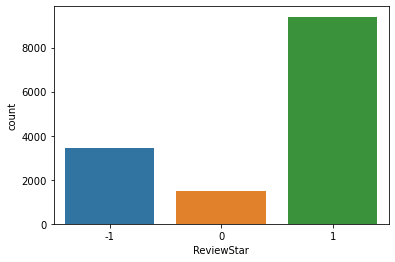

In [5]:
import seaborn as sns

sns.countplot(df['ReviewStar'])

In [6]:
def cleaning_sentense(sentense):
    sentense = re.sub('[^a-zA-Z0-9]', ' ', sentense)
    sentense = sentense.lower()
    return sentense

df['ReviewBody'] = df['ReviewBody'].apply(cleaning_sentense)

In [7]:
#subjectivity and polarity
# Not required in this dataset as we already have their original ratings

def get_subjectivity(text):
  return(TextBlob(text)).sentiment.subjectivity

def get_polarity(text):
  return(TextBlob(text)).sentiment.polarity

df['subjectivity'] = df['ReviewBody'].apply(get_subjectivity)
df['polarity'] = df['ReviewBody'].apply(get_polarity)
df.head()  

# Can round off these values upto 2 decimal points

,ReviewBody,ReviewStar,subjectivity,polarity
0,no doubt it has a great bass and to a great ex...,0,0.496667,0.023077
1,this earphones are unreliable i bought it be...,-1,0.479464,0.260714
2,i bought itfor 999 i purchased it second time ...,1,0.666667,0.440909
3,its sound quality is adorable overall it was ...,-1,0.500000,0.400000
4,its awesome good sound quality 8 9 hrs ba...,1,0.691111,0.195000


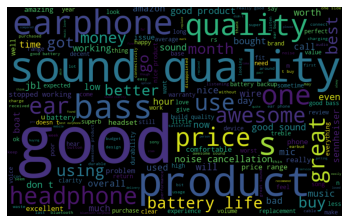

In [8]:
# Review Body

text = " ".join(df['ReviewBody'])
wc = WordCloud(width = 800, height = 500).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

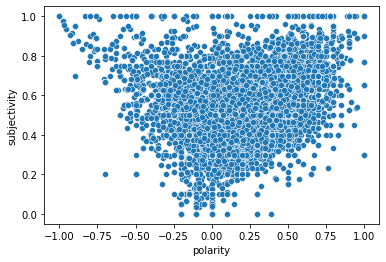

In [9]:
sns.scatterplot(x='polarity', y='subjectivity', data = df)

In [10]:
pos_review = df[df['ReviewStar'] == 1]['ReviewStar']
neg_review = df[df['ReviewStar'] == -1]['ReviewStar']
neu_review = df[df['ReviewStar'] == 0]['ReviewStar']

classify = [pos_review, neu_review, neg_review]
perc = [round((i.shape[0]/df.shape[0])*100, 1) for i in classify]
perc

[65.6, 10.5, 23.9]

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
all_stopwards = stopwords.words('english')
print(set(all_stopwards), end = " ")

{'am', 'being', 'and', 'having', 'them', 'aren', 'was', 'we', "weren't", 'herself', 'its', 'those', "couldn't", 'has', "shouldn't", 'very', "wasn't", 'down', 'which', 'some', 'she', 're', 'been', "shan't", 'is', "isn't", 'under', 'ma', 'himself', 'because', 'needn', 'yourself', 'off', 'have', 'who', 'these', 'out', 'him', 'there', 'about', 'than', 'at', 'isn', 'weren', "won't", 'their', 'theirs', 'mightn', 'no', 'o', 'they', 'again', 'he', 'themselves', 'further', 'not', 'are', 'such', "she's", 'his', 'this', 't', 'me', 'after', 'each', 'what', 'when', "haven't", 'during', 'into', "hadn't", 'wasn', 'against', "don't", 'her', 'from', 'haven', 'why', "doesn't", "wouldn't", 'yourselves', 'by', 'or', 'just', 'once', 'but', 'an', 'll', 'more', "you'd", 'be', 'now', 'yours', 'myself', "aren't", 'ours', 'won', 'i', 's', 'to', "that'll", 'did', 'most', 'both', 'hadn', 'it', "you'll", 'shouldn', 'other', "you're", 'up', 'can', 'does', 'you', "hasn't", 'nor', 'will', 'through', 'our', 'should', 

In [13]:
def preprocessing(review):
    words = review.split()
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    sentense = ' '.join(words)
    
    return sentense

In [14]:
df['ReviewBody2'] = df['ReviewBody'].apply(preprocessing)

vec = CountVectorizer(max_features = 8000, ngram_range=(1,2))

X = vec.fit_transform(df['ReviewBody2']).toarray()

In [15]:
df.head()

,ReviewBody,ReviewStar,subjectivity,polarity,ReviewBody2
0,no doubt it has a great bass and to a great ex...,0,0.496667,0.023077,no doubt it ha a great bass and to a great ext...
1,this earphones are unreliable i bought it be...,-1,0.479464,0.260714,thi earphon are unreli i bought it befor 15 da...
2,i bought itfor 999 i purchased it second time ...,1,0.666667,0.440909,i bought itfor 999 i purchas it second time gi...
3,its sound quality is adorable overall it was ...,-1,0.500000,0.400000,it sound qualiti is ador overal it wa good but...
4,its awesome good sound quality 8 9 hrs ba...,1,0.691111,0.195000,it awesom good sound qualiti 8 9 hr batteri li...


In [16]:
y = df['ReviewStar']
y.head()

0    0
1   -1
2    1
3   -1
4    1
Name: ReviewStar, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[283 268 125]
 [ 74 135 103]
 [193 754 933]]


0.4710599721059972

# Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    cl = LogisticRegression(C=c)
    cl.fit(X_train, y_train)
    print (f"Accuracy for C = {c}: {accuracy_score(y_test, cl.predict(X_test))}")

Accuracy for C = 0.01: 0.793584379358438
Accuracy for C = 0.05: 0.8089260808926081
Accuracy for C = 0.25: 0.8113668061366807
Accuracy for C = 0.5: 0.8057880055788006
Accuracy for C = 1: 0.8050906555090656


In [22]:
cl = LogisticRegression(C=0.25)
cl.fit(X_train, y_train)

LogisticRegression(C=0.25)

In [23]:
cm = confusion_matrix(y_test, cl.predict(X_test))
print(cm)
accuracy_score(y_test, cl.predict(X_test))

[[ 517   33  126]
 [  95   44  173]
 [  73   41 1766]]


0.8113668061366807

In [24]:
testing_text = 'It is Awesome, i loved the product. Excellent quality. Value of money'
testing_text = cleaning_sentense(testing_text)
testing_text = preprocessing(testing_text)
testing_text = vec.transform([testing_text])
cl.predict(testing_text)

array([1], dtype=int64)